# Convolution using the OpenCV Library
---

Author: F.Kesel, 13.5.24

In this Jupyter Notebook the convolution of an 8 Bit gray scale image is calculated. The notebook generates the input and reference image for HLS and SW verification on the Kria Board as binary data in corresponding files.

In the following cell the necessary libraries are imported and the filter matrix or kernel is defined for a 3x3 2D filter, which will be used for convolution afterwards. With the identity kernel the resulting image should be the same as the input image. The Laplace filter calculates a resulting image, which shows the edges of the input image. The filter coefficients are written out as a C include file, in order to be used in the subsequent design stages (HLS and SW). The data format for the filter coefficients is 16 Bit signed, as used by the corresponding Xilinx OpenCV function. 

There are several input images available in the directory `../images`, with different sizes. All images are gray scale images coded with 8 Bit. If parallel operation is used in the IP core then the width must be a multiple of 8. There is a maximum resolution set in the IP core which is currently full HD (1080x1920 pixels), but the IP core can also process smaller images. It is recommended to first start with smaller images, in order to be better able to debug the code.

The image is read into a numpy array (`numpy.ndarray`) . Check that the size matches the expected size and the that the data type is `uint8`. Input and reference image are also generated as binary files in the directory  `../images` for use HLS and bare metal. The data paths for the files are specified below.  

In [1]:
# Import the necessary libraries
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Define filter kernel (data format is 16 Bit integer)
filter = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]], dtype=np.int16) ##Identity 
#filter = np.array([(0,1,0), (1,-4,1), (0,1,0)], dtype=np.int16) #Laplace Filter (Edge detection)
#filter = np.array([(1,0,-1), (2,0,-2), (1,0,-1)], dtype=np.int16) #Sobel Filter (Edge detection)

# Image files for parallel execution in the IP core:
# Small image 64x64
image_file_name = "../images/image_64x64.bmp"
# Large image 656x880
#image_file_name = "../images/image_880x656.bmp"
# HD image 1080x1920
#image_file_name = "../images/image_1920x1080.bmp"

# The following files will be generated by this notebook.
# Result or reference file in bmp-format for viewing
ref_file_name = "../data/ref_image.bmp"
# Input and reference file in binary format (8 Bit unsigned) for verification in HLS / bare metal
input_bin_file_name = "../data/input_image.bin"
reference_bin_file_name = "../data/ref_image.bin"
# Filter coefficients as C include file
filter_file_name = "../data/coeffs.h"

# Read input image
img = cv.imread(image_file_name, cv.IMREAD_GRAYSCALE) #Read image in grayscale
print("Image shape (height, width):", img.shape)
print("Data type: ", img.dtype)


Image shape (height, width): (64, 64)
Data type:  uint8


In the next cell the 2D filter is calculated, which is basically a 2D convolution:
* Syntax: filter2D (src, ddepth, kernel)
* Parameters:  
    * Src – The source image to apply the filter on.
    * Ddepth – Depth of the output image [ -1 will give the output image depth the same as the input image]
    * Kernel – The 2d matrix we want the image to convolve with.
    * borderType - Defines the values at the border of the image (must be the same as in HLS!)
* The filter returns a numpy array with the same size and data type.

Finally the reference image is shown and written in bmp-format and input image and reference image are written in binary format (1 pixel = 1 byte) for verification in HLS and Bare-Metal. The filter coefficients are written as C include file.

Image shape of resulting image: (64, 64)
Data type:  uint8


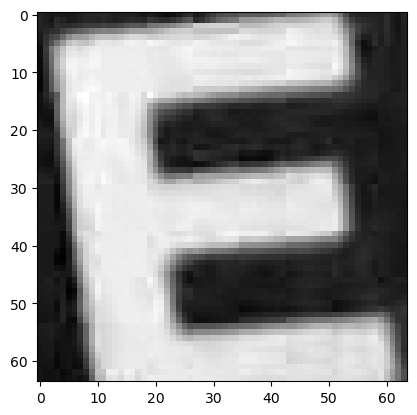

In [2]:
# Calculate the 2D filter, i.e. convolution
ref = cv.filter2D(src=img, ddepth=-1, kernel=filter, borderType=cv.BORDER_CONSTANT)

print("Image shape of resulting image:", ref.shape)
print("Data type: ", ref.dtype)

# Write reference image in bmp-format
cv.imwrite(ref_file_name, ref)

# Show the image with matplotlib
plt.imshow(ref, cmap='gray')
plt.show()

# Write input and reference image in binary format for HLS
img.tofile(input_bin_file_name)
ref.tofile(reference_bin_file_name)

# Write filter coefficients to a C-header file
filtout = filter.flatten()
filter_file = open(filter_file_name, "w")
filter_file.write("#define COEFF_VAL {")
for elem in np.nditer(filtout[:8]):
    filter_file.write(f"{elem}, ")
filter_file.write(f"{filtout[8]} ")
filter_file.write("}")
filter_file.close()

